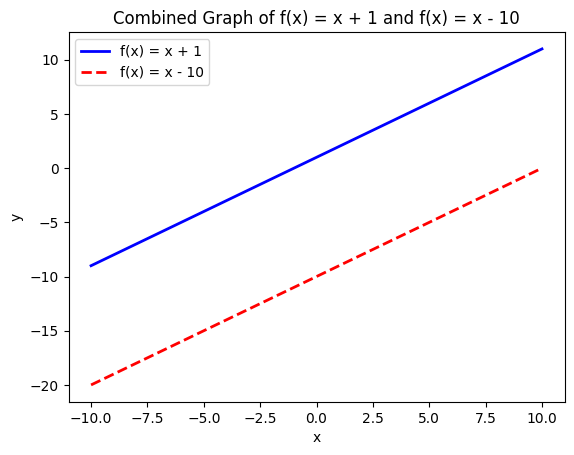

In [80]:
import numpy as np
import matplotlib.pyplot as plt

# Define the range of x values to plot
x = np.linspace(-10, 10, 1000)

# Evaluate the two formulas for each value of x
y1 = x + 1
y2 = x - 10

# Plot the two curves on the same graph
plt.plot(x, y1, 'b-', linewidth=2)  # blue line for f(x) = x + 1
plt.plot(x, y2, 'r--', linewidth=2)  # red dashed line for f(x) = x - 10

# Add a title and axis labels
plt.title('Combined Graph of f(x) = x + 1 and f(x) = x - 10')
plt.xlabel('x')
plt.ylabel('y')

# Add a legend
plt.legend(['f(x) = x + 1', 'f(x) = x - 10'])

# Display the plot
plt.show()


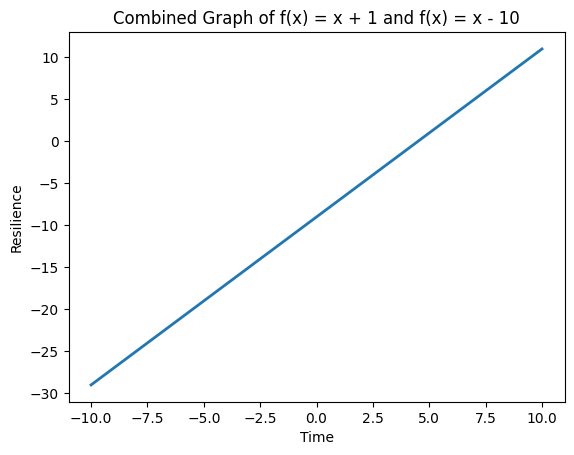

In [82]:
import numpy as np
import matplotlib.pyplot as plt

# Define the range of x values to plot
x = np.linspace(-10, 10, 1000)

# Evaluate the two formulas for each value of x and combine the results
y = x + 1 + x - 10

# Plot the curve
plt.plot(x, y, linewidth=2)

# Add a title and axis labels
plt.title('Combined Graph of f(x) = x + 1 and f(x) = x - 10')
plt.xlabel('Time')
plt.ylabel('Resilience')

# Display the plot
plt.show()


In [124]:
# Formula from: https://structx.com/Stress_Strain_012.html
# ∆T = change in temperature, ᵒK or ᵒC
averagetemp = 12 # C
newmaxtemp = 40 # C
DeltaT = newmaxtemp - averagetemp 

# α = coefficient of thermal expansion, ᵒK-1 or ᵒC-1
material = "concrete"
match material:
# Source for coefficients: https://www.engineeringtoolbox.com/linear-expansion-coefficients-d_95.html
    case "concrete":
        thermalexpension = 9.8 * 10**-6 # concrete
    case "wood":
        thermalexpension = 30 * 10**-6 # wood perpendicular to grain
    case "steel":
        thermalexpension = 12.5 * 10**-6 # steel

# L = length under consideration, in or mm
L = 3600 # mm

# ∆L = change in length, in or mm
DeltaL = thermalexpension * DeltaT * L

print(round(DeltaL, 3), "mm")

0.988 mm


In [76]:
import math

# Loaded info
material = "wood"
Length = 3 # m
Height = 0.6 # m
Width = 0.2 # m
WaterType = "salt"
citytype = "city"
DesignStillwaterDepth = 3 # m

def Youngsmodulus():
    #  Modulus of elasticity in MPa
    match material:
        # Source: https://www.calculand.com/unit-converter/stoffe-liste.php?gruppe=Elastic+modulus+%28E%29%2C+Young%27s+modulus&einheit=1e6--MPa
        case "concrete":
            ElasticityModulus =  15000 # MPA concrete
        case "wood":
            ElasticityModulus =  7000 # MPA wood 
        case "steel":
            ElasticityModulus =  210000 # MPA steel
    return ElasticityModulus

def MomentOfInertia():
    # Second moment of area in m4
    match material:
        case "concrete":
            MomentOfInertia = ((Width * (Height**3))) / 12 #
        case "wood":
            MomentOfInertia = ((Width * (Height**3)) / 12) #  
        case "steel":
            MomentOfInertia = 7763 / 1000 # cm^4 to m4 steel HE 260A
    return MomentOfInertia

# specific weights per water type
def SpecificWeightWater():
    match WaterType:
        case "salt":
            SpecificWeightWater = 64.0 * 16.0185 # lb/ft3 to kg/m3
        case "fresh":
            SpecificWeightWater = 62.4 * 16.0185 # lb/ft3 to kg/m3
    return SpecificWeightWater

# Debris Impact Load
def WeightOfObject():
    match citytype:
        case "city":
            WeightOfObject = 1
        case "village":
            WeightOfObject = 1
        case "plains":
            WeightOfObject = 1
    return WeightOfObject

# t = duration of impact in seconds
def impacttime():
    match material:
    # City of Honolulu building code for impact durations
        case "concrete":
            impacttime = 0.1 # second
        case "wood":
            impacttime = 1 # second 
        case "steel":
            impacttime = 0.5 # second
    
SpecificWeightWater = SpecificWeightWater()

# Breaking wave calculation
def breakingwave():
    DragCoefficient = 2.25 # if square
    HeightMetric = Height * 0.3048
    BreakingWaveOnPiles = 0.5 * DragCoefficient * SpecificWeightWater * HeightMetric * (DesignStillwaterDepth**2)
    return BreakingWaveOnPiles

# Hydrostatic
def hydrostatic():
    HydrostaticLoad = 0.5 * SpecificWeightWater * (DesignStillwaterDepth**2) # kg
    return HydrostaticLoad

# Couldn't convert to metric, thus this function will be in imperial
# Hydrodynamic (Fluid dynamics)
def hydrodynamic():
    GravitationalConstant = 9.81
    Velocity = (GravitationalConstant * DesignStillwaterDepth)**0.5 # V = (gds)0.5
    CrossArea = Height * Width
    DragCoefficient = 2 # square
    match WaterType:
        case "salt":
            MassDensityFluid = 1.99  # slugs/ft3 
        case "fresh":
            MassDensityFluid = 1.94  # slugs/ft3 
    VelocityImp = Velocity * 3.2808399
    CrossAreaImp = CrossArea * 10.7639
    HydrodynamicLoad = 0.5 * DragCoefficient * MassDensityFluid * (VelocityImp**2) * CrossAreaImp
    return HydrodynamicLoad

def debrisimpact():
    return None

BreakingWaves = breakingwave()
Load = (BreakingWaves * 9.81) / 1000 # Fz (kN) = m*g / 1000 
HydrodynamicLoad = hydrodynamic()
HydrostaticLoad = hydrostatic()
LoadCombination = HydrodynamicLoad + HydrostaticLoad
if LoadCombination > Load:
    Load = (LoadCombination * 9.81) / 1000 # Fz (kN) = m*g / 1000 
print(round(Load, 2), "kN")

def reactionloads():
    ReactionloadR1 = ((Load * (DesignStillwaterDepth * 1/3)**2) / (2* Length**3)) * ((DesignStillwaterDepth*2/3) + (2*Length))
    ReactionloadR2 = ((Load * (DesignStillwaterDepth * 2/3)) / (2* (Length**3))) * ((3 * (Length**2)) - ((DesignStillwaterDepth*2/3)**2))
    return ReactionloadR1, ReactionloadR2

ReactionLoads = reactionloads()
print("R1", ReactionLoads[0], "kN", "R2", ReactionLoads[1], "kN")

def moments():
    # from structx
    MomentLoad = ReactionLoads[0] * (DesignStillwaterDepth * 2/3)
    MomentFixed = ((Load * (DesignStillwaterDepth * 2/3) * (DesignStillwaterDepth * 1/3)) / (2 * (Length**2))) * ((DesignStillwaterDepth * 2/3) + Length)
    return MomentLoad, MomentFixed

MomentLoads = moments()
print("M1", MomentLoads[0], "kN", "M2", MomentLoads[1], "kN")

Elasticity = Youngsmodulus()
Inertia = MomentOfInertia() 

def deflection():
    # from structx
    if (DesignStillwaterDepth * 2/3) < (0.414 * Length):
        MaxDeflection = (Load * (DesignStillwaterDepth * 2/3) / (3 * Elasticity * Inertia)) * ()
    elif (DesignStillwaterDepth * 2/3) > (0.414 * Length):
        MaxDeflection = ((Load * (DesignStillwaterDepth * 2/3) * ((DesignStillwaterDepth * 1/3)**2)) / (6 * Elasticity * Inertia)) * math.sqrt((DesignStillwaterDepth * 2/3) / ((2*Length)+(DesignStillwaterDepth * 2/3)))
    return MaxDeflection
Maxdef = deflection() 
print(Maxdef * 100, "cm")

# Max deflection limits Column
match material:
     # Source: Eurocode 5, 3, 2 (in order)
    case "concrete":
        PermittedDeflection =  (Length * 1000) / 500 # EUC 5 Concrete
    case "wood":
        PermittedDeflection =  (Length * 1000) / 300 # EUC 3 wood 
    case "steel":
        PermittedDeflection =  (Length * 1000) / 500 # EUC 2 steel

if Maxdef < PermittedDeflection:
    print("Deflection: Risk detected", "permitted amount is", round(PermittedDeflection, 3), "mm occuring amount is", round(Maxdef * 1000, 3), "mm")
else:
    print("Deflection: Column is OK", "permitted amount is", round(PermittedDeflection, 3), "mm occuring amount is", round(Maxdef * 1000, 3), "mm")

# CrossSectionalArea
match material:
     # Source: Eurocode 5, 3, 2 (in order)
    case "concrete":
        CrossSectionalArea = Height * Width # m2
    case "wood":
        CrossSectionalArea = Height * Width # m2
    case "steel":
        CrossSectionalArea =  86.82 / 10000 # cm2 to m2 [PLACEHOLDER] steel HE 260A
        
# Shear Stress τ = V / A
ShearForce = Load
ShearStress = ShearForce / CrossSectionalArea

match material:
     # Source: Eurocode 
    case "concrete":
        AllowableShearStress = 0.5 * 1000 # EUC 2, MPa to kN/m2
    case "wood":
        AllowableShearStress = 0.5 * 1000 # EUC 5, MPa to kN/m2
    case "steel":
        AllowableShearStress =  140 * 1000 # EUC 3, MPa to kN/m2     

if ShearStress > AllowableShearStress:
    print("Shear Stress: Risk detected", "permitted amount is", round(AllowableShearStress, 3), "kN/m2 occuring amount is", round(ShearStress, 3), "kN/m2")
else:
    print("Shear Stress: Column is OK", "permitted amount is", round(AllowableShearStress, 3), "kN/m2 occuring amount is", round(ShearStress, 3), "kN/m2")   

# Bending Stress σ = My/I
if MomentLoads[0] > MomentLoads[1]:
    MomentLoads = MomentLoads[0]
else: 
    MomentLoads = MomentLoads[1]
BendingStress = (MomentLoads * (Height/2)) / Inertia

match material:
     # Source: Eurocode 
    case "concrete":
        AllowableBendingStress = 5 * 1000 # EUC 2, MPa to kN/m2
    case "wood":
        AllowableBendingStress = 10 * 1000 # EUC 5, MPa to kN/m2
    case "steel":
        AllowableBendingStress =  235 * 1000 # EUC 3, MPa to kN/m2  

if BendingStress > AllowableBendingStress:
    print("Bending Stress: Risk detected", "permitted amount is", round(AllowableBendingStress, 3), "kN/m2 occuring amount is", round(BendingStress, 3), "kN/m2")
else:
    print("Bending Stress: Column is OK", "permitted amount is", round(AllowableBendingStress, 3), "kN/m2 occuring amount is", round(BendingStress, 3), "kN/m2")  

53.24 kN
R1 7.888097868097178 kN R2 45.356562741558776 kN
M1 15.776195736194357 kN M2 29.580367005364415 kN
35.21472262543383 cm
Deflection: Risk detected permitted amount is 10.0 mm occuring amount is 352.147 mm
Shear Stress: Column is OK permitted amount is 500.0 kN/m2 occuring amount is 443.706 kN/m2
Bending Stress: Column is OK permitted amount is 10000 kN/m2 occuring amount is 2465.031 kN/m2
